In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss
import pywt

Tifpath = 'StageGMM4_2020_SA4CD/Data/Paracou_125MHz/geo5Md3iHV_t4-7_NCI7_lkLcl3-5-t7_lkRgn9-15.tif'


from osgeo import gdal
from scipy import fftpack
import numpy.linalg as npl



In [4]:
gdal.UseExceptions()
ds = gdal.Open(Tifpath)
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())

ds_target1 = np.zeros(len(ds_band1[1000,:]))
ds_target3 = np.zeros(len(ds_band3[1000,:]))

Ny,Nx = np.shape(ds_band3)
x = np.linspace(0,Nx*5,Nx)
y = np.linspace(0,Ny*5,Ny)


In [8]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

(751, 1)


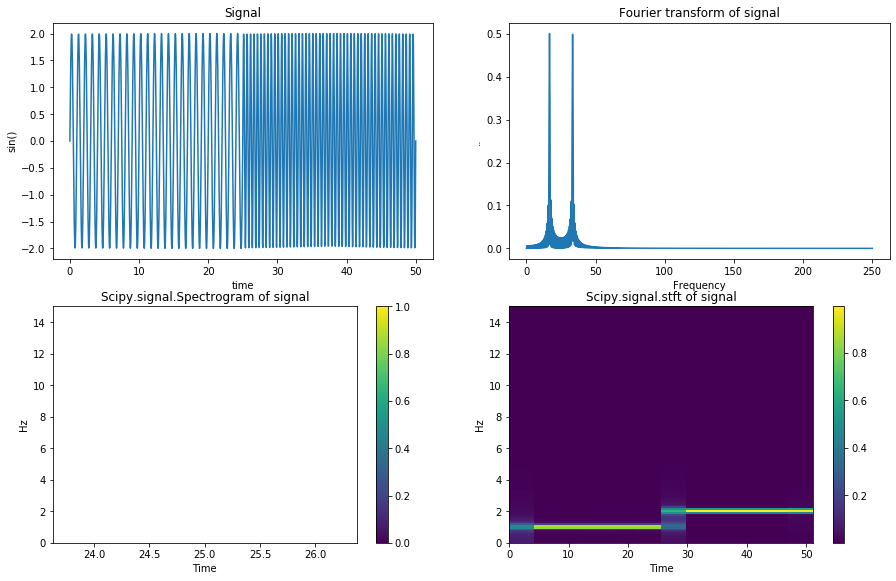

In [5]:

sss = 0 # start of interval
se = 50 # end of interval
amp = 2 * 0.5 # 1
fs = 30 # Sampling frequency (sampled points per time unit)
N = fs * se # number of sampled points
time = np.linspace(0,se,N)  # time points
freq = 2
y= 2*np.sin(np.pi*2*freq*time)*(time>se//2)+2*np.sin(np.pi*freq*time)*(time<se//2)
ftime = np.linspace(0,se*fs/2,N//2)/3 # frequencies
fy = np.fft.fft(y)[:len(y)//2]/len(y) # fourier transform of y

f, t, Z = ss.spectrogram(y, fs,nperseg= len(y)) # sliding window of y
print(Z.shape)
ff,tt,ZZ = ss.stft(y,fs)
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
plt.plot(time,y)
plt.xlabel("time")
plt.ylabel("sin()")
plt.title("Signal")
plt.subplot(4,2,2)
plt.xlabel("Frequency")
plt.ylabel("..")
plt.plot(ftime,np.abs(fy))
plt.title("Fourier transform of signal")

plt.subplot(4,2,3)
plt.pcolormesh(t,f,Z)
plt.colorbar()
plt.ylabel('Hz')
plt.xlabel('Time')
plt.title("Scipy.signal.Spectrogram of signal")
plt.subplot(4,2,4)
plt.pcolormesh(tt,ff,np.abs(ZZ))
plt.colorbar()
plt.ylabel('Hz')
plt.xlabel('Time')
plt.title("Scipy.signal.stft of signal")

plt.show()

In [6]:
qmf = "morl"

#f = pywt.scale2frequency(qmf, scale)/sampling_period
w = 10
d1t = np.arange(N)/float(fs)
d1f = np.linspace(0., 0.4, 200)
widths = w * fs /(2*d1f * np.pi) # w = 2 pi f #fenêtrage 
coeff, freq= pywt.cwt(y, scales = d1f, wavelet = 'morl')
print((coeff.shape))
print(d1f.shape)
print(d1t.shape)
plt.figure(figsize=(10,8))
plt.pcolormesh(ftime, d1f, np.abs(coeff))



<ipython-input-6-7b951ec8799f>:7: RuntimeWarning: divide by zero encountered in true_divide
  widths = w * fs /(2*d1f * np.pi) # f = 2 pi w
/home/larousse/anaconda3/envs/ox/lib/python3.8/site-packages/pywt/_cwt.py:150: RuntimeWarning: invalid value encountered in true_divide
  j = np.arange(scale * (x[-1] - x[0]) + 1) / (scale * step)


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 1024

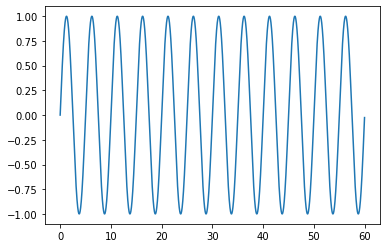

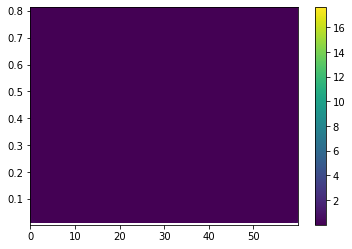

In [7]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

Tobs = 60
fs = 50.
N = Tobs*fs

d1t = np.arange(N)/float(fs)
f = 0.2
y = np.sin(2*f*np.pi*d1t)

d1f = np.linspace(0,f,200)
widths = 10*fs / (2*np.arange(1,200)*np.pi)

plt.plot(d1t,y)
plt.show()

coef, freqs=pywt.cwt(y,np.arange(1,200),'morl')

plt.pcolormesh(d1t, freqs, np.abs(coef))
plt.colorbar()
plt.show() # doctest: +SKIP

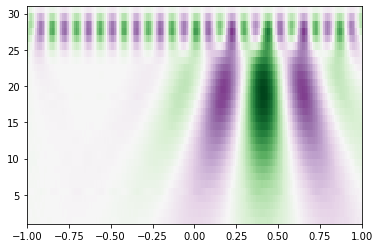

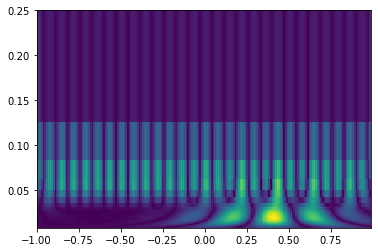

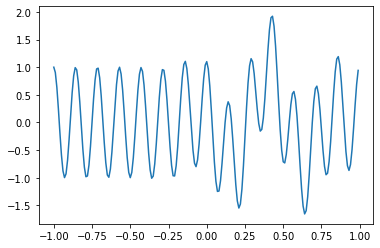

/home/larousse/anaconda3/envs/ox/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


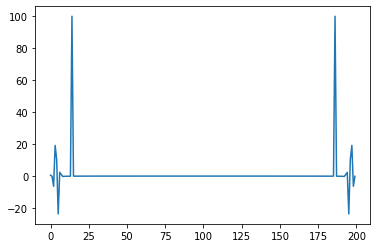

In [8]:
>>> import pywt
>>> import numpy as np
>>> import matplotlib.pyplot as plt
>>> t = np.linspace(-1, 1, 200, endpoint=False)
>>> sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
>>> widths = np.arange(1, 31)
>>> cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
>>> plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
...            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
>>> plt.show() # doctest: +SKIP

plt.pcolormesh(t,freqs, np.abs(cwtmatr))
plt.show()
plt.plot(t,sig)
plt.show()
plt.plot(fftpack.fft(sig))